<a href="https://colab.research.google.com/github/Calebcarp/CS290/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files



In [ ]:
files.upload()


{}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [11]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [12]:
! kaggle competitions download -c 'ObesityDataSet_raw_and_data_sinthetic'



Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [13]:
!kaggle datasets download -d fatemehmehrparvar/obesity-levels

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/57.6k [00:00<?, ?B/s]
100% 57.6k/57.6k [00:00<00:00, 58.7MB/s]


In [14]:
import zipfile

In [15]:
zip_ref = zipfile.ZipFile('obesity-levels.zip', 'r')

In [16]:
zip_ref.extractall('/content')

In [17]:
zip_ref.close()

In [18]:
import os
os.listdir('/content')

['.config',
 'ObesityDataSet_raw_and_data_sinthetic.csv',
 'obesity-levels.zip',
 'sample_data']

In [ ]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [20]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [21]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
train_set, test_set = train_test_split(df, test_size=0.2)


In [23]:
train_set.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [24]:
print(df.columns)


Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [25]:
train_set = train_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"]]

In [26]:
test_set = test_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"]]

In [27]:
X_train = train_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]]
y_train = train_set["NObeyesdad"]

In [28]:
X_test = test_set[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]]
y_test = test_set["NObeyesdad"]

In [29]:
num_attributes = X_train.select_dtypes( include = ['int64','float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [30]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [31]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [32]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.65088757, 0.60946746, 0.64201183, 0.60534125, 0.64985163])

In [33]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [34]:
predictions = pipeline.predict( X_test )

In [35]:
cm = confusion_matrix( y_test, predictions )

In [36]:
cm


array([[32, 23,  0,  0,  0,  2,  0],
       [ 3, 20,  0,  0,  0, 23,  2],
       [ 0,  0, 12,  5,  0,  1, 45],
       [ 0,  0,  3, 63,  0,  0,  1],
       [ 0,  0,  0,  0, 66,  0,  0],
       [ 0,  3,  0,  0,  0, 46, 20],
       [ 0,  1,  0,  3,  0,  5, 44]])

[Text(0.5, 0.875, 'x[2] <= 0.499\ngini = 0.856\nsamples = 1688\nvalue = [215, 239, 288, 230, 258, 221, 237]'),
 Text(0.25, 0.625, 'x[2] <= -1.017\ngini = 0.801\nsamples = 1111\nvalue = [215, 239, 197, 4, 0, 221, 235]'),
 Text(0.125, 0.375, 'x[1] <= -0.46\ngini = 0.484\nsamples = 338\nvalue = [211, 120, 0, 0, 0, 7, 0]'),
 Text(0.0625, 0.125, 'gini = 0.52\nsamples = 176\nvalue = [68, 101, 0, 0, 0, 7, 0]'),
 Text(0.1875, 0.125, 'gini = 0.207\nsamples = 162\nvalue = [143, 19, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.375, 'x[2] <= -0.403\ngini = 0.742\nsamples = 773\nvalue = [4, 119, 197, 4, 0, 214, 235]'),
 Text(0.3125, 0.125, 'gini = 0.627\nsamples = 279\nvalue = [4, 103, 3, 0, 0, 130, 39]'),
 Text(0.4375, 0.125, 'gini = 0.658\nsamples = 494\nvalue = [0, 16, 194, 4, 0, 84, 196]'),
 Text(0.75, 0.625, 'x[9] <= 0.5\ngini = 0.622\nsamples = 577\nvalue = [0, 0, 91, 226, 258, 0, 2]'),
 Text(0.625, 0.375, 'x[7] <= 1.363\ngini = 0.008\nsamples = 258\nvalue = [0, 0, 0, 1, 257, 0, 0]'),
 Text(0.5625, 0.125

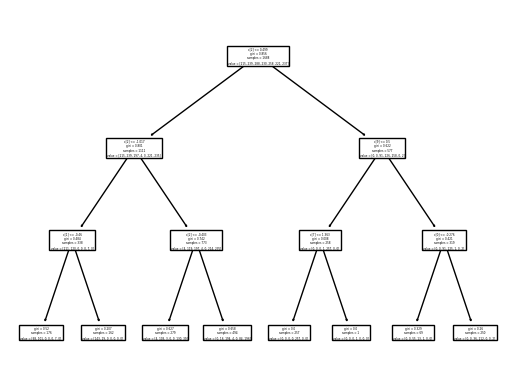

In [37]:
plot_tree( pipeline.named_steps['clf'])

In [38]:
X = df[["Age", "Gender", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]]
y = df["NObeyesdad"]

In [39]:

df = pd.concat( [X,y], axis=1 )
df.head()

,Age,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [40]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [41]:
features = df.columns[ df.columns != "NObeyesdad" ]
features

Index(['Age', 'Gender', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [82]:
target = "NObeyesdad"
attribute = "NCP"

In [83]:

vals = df[ attribute].unique()
vals

array([3.      , 1.      , 4.      , 3.28926 , 3.995147, 1.72626 ,
       2.581015, 1.600812, 1.73762 , 1.10548 , 2.0846  , 1.894384,
       2.857787, 3.765526, 3.285167, 3.691226, 3.156153, 1.07976 ,
       3.559841, 3.891994, 3.240578, 3.904858, 3.11158 , 3.590039,
       2.057935, 3.558637, 2.000986, 3.821168, 3.897078, 3.092116,
       3.286431, 3.592415, 3.754599, 3.566082, 3.725797, 3.520555,
       3.731212, 1.259803, 1.273128, 3.304123, 3.647154, 3.300666,
       3.535016, 1.717608, 2.884479, 3.626815, 1.473088, 3.16645 ,
       3.494849, 2.99321 , 2.127797, 3.90779 , 3.699594, 3.179995,
       1.075553, 3.238258, 3.804944, 1.630846, 3.762778, 3.371832,
       2.705445, 3.34175 , 2.217651, 2.893778, 3.502604, 3.998766,
       3.193671, 1.69608 , 2.812377, 1.612747, 1.082304, 1.882158,
       2.326233, 1.989398, 1.735493, 2.974568, 3.715118, 3.489918,
       3.378859, 3.263201, 3.994588, 3.24934 , 3.087544, 1.163666,
       3.409363, 3.281391, 3.98525 , 3.207071, 3.471536, 3.488

In [84]:
props = df[ df[attribute] == vals[8] ][target].value_counts( normalize=True )
props

,proportion
NObeyesdad,
Insufficient_Weight,0.5
Overweight_Level_I,0.5


In [85]:
entropy = 0
overall = len( df )
for val in vals:
  subset_size = len(df[ df[attribute] == val ])
  weight = subset_size / overall
  props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))

entropy

1.812636531560182

In [73]:
def Attribute_selection_method(df, target_variable, method):
    if method not in ["entropy", "gini"]:
        raise ValueError("Method must be 'entropy' or 'gini'")

    attributes = df.columns[df.columns != target_variable]
    total_value = 0
    count = 0

    for attribute in attributes:
        vals = df[attribute].unique()
        overall = len(df)

        if method == "entropy":
            entropy = 0
            for val in vals:
                subset = df[df[attribute] == val]
                subset_size = len(subset)
                weight = subset_size / overall
                props = subset[target_variable].value_counts(normalize=True)
                for p in props:
                    entropy -= weight * (p * math.log2(p))
            total_value += entropy

        elif method == "gini":
            gini = 0
            for val in vals:
                subset = df[df[attribute] == val]
                subset_size = len(subset)
                weight = subset_size / overall
                props = subset[target_variable].value_counts(normalize=True)
                gini_index = 1 - sum(p**2 for p in props)
                gini += weight * gini_index
            total_value += gini

        count += 1
    mean_value = total_value / count
    return mean_value

In [74]:
df = pd.concat([X, y], axis=1)

In [75]:
target_variable = "NObeyesdad"

In [76]:
method = "entropy"  # or "gini"

In [77]:
result = Attribute_selection_method(df, target_variable, method)

In [78]:
print(result)

1.8023737092155145
